Tensors in PyTorch are similar to NumPy's arrays, except that tensors are optimized for automatic differentiation and can run on GPUs
* a scalar: rank-0 tensor
* a vector: rank-1 tensor
* a matrix: rank-2 tensor
* matrices stacked in a third dimension: rank-3 tensors

In [5]:
import torch
import numpy as np
print(torch.__version__)

2.5.1+cpu


Creating tensors

In [4]:
a = [1,2,3]
b = np.array([4, 5, 6], dtype=np.int32)
t_a = torch.tensor(a)
t_b = torch.from_numpy(b)
print(t_a)
print(t_b)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


In [5]:
t_ones = torch.ones(2, 3)
t_ones.shape

torch.Size([2, 3])

In [7]:
t_a_new = t_a.to(torch.int64)
t_a_new

tensor([1, 2, 3])

In [8]:
t = torch.rand(3, 5)
torch.transpose(t, 0, 1)

tensor([[0.7064, 0.3809, 0.7740],
        [0.9453, 0.4760, 0.7917],
        [0.0147, 0.5714, 0.4770],
        [0.0754, 0.6381, 0.3532],
        [0.2145, 0.9598, 0.5758]])

In [10]:
torch.manual_seed(1)
t1 = 2 * torch.rand(5, 2) - 1
t2 = torch.normal(mean=0, std=1, size=(5, 2))

In [ ]:
torch.multiply(t1, t2) # same as t1 * t2

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])

In [19]:
print(t1)
print(t2)

tensor([[ 0.5153, -0.4414],
        [-0.1939,  0.4694],
        [-0.9414,  0.5997],
        [-0.2057,  0.5087],
        [ 0.1390, -0.1224]])
tensor([[ 0.8590,  0.7056],
        [-0.3406, -1.2720],
        [-1.1948,  0.0250],
        [-0.7627,  1.3969],
        [-0.3245,  0.2879]])


In [17]:
t1[:, 0].mean(), torch.mean(t1, axis=0)

(tensor(-0.1373), tensor([-0.1373,  0.2028]))

In [18]:
torch.matmul(t1, torch.transpose(t2, 0, 1))

tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])

In [20]:
torch.linalg.norm(t1, ord=2, dim=1)

tensor([0.6785, 0.5078, 1.1162, 0.5488, 0.1853])

In [23]:
for i in range(t1.shape[0]):
    print(t1[i].norm())

tensor(0.6785)
tensor(0.5078)
tensor(1.1162)
tensor(0.5488)
tensor(0.1853)


In [29]:
t = torch.rand(5)
print(t)
torch.split(t, split_size_or_sections=[3,2])

tensor([0.1330, 0.1169, 0.9621, 0.1280, 0.5433])


(tensor([0.1330, 0.1169, 0.9621]), tensor([0.1280, 0.5433]))

In [32]:
torch.cat([torch.ones(3), torch.ones(2)], axis=0)

tensor([1., 1., 1., 1., 1.])

In [34]:
torch.stack([torch.ones(3), torch.zeros(3)], axis=1)

tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])

when dataset is too large to fit into the computer memory, we will need to load from the storage device, **batch by batch**

In [36]:
from torch.utils.data import DataLoader
t = torch.arange(6, dtype=torch.float32)
data_loader = DataLoader(t, batch_size=3, drop_last=False)
for item in data_loader:
    print(item)

tensor([0., 1., 2.])
tensor([3., 4., 5.])


In [7]:
import torchvision
import matplotlib.pyplot as plt
image_path = './'
mnist_dataset = torchvision.datasets.MNIST('./', 'train', download=False)

In [8]:
assert isinstance(mnist_dataset, torch.utils.data.Dataset)

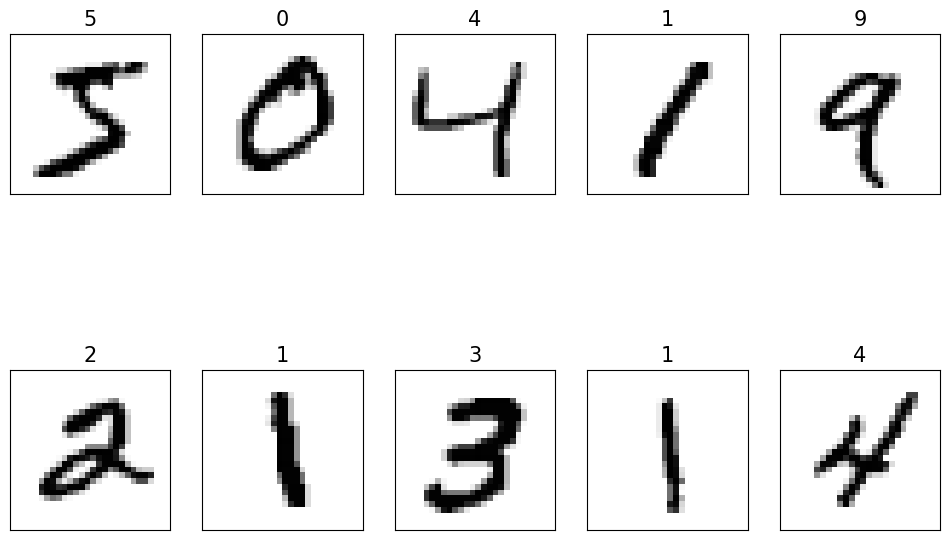

In [12]:
from itertools import islice
fig = plt.figure(figsize=(12, 8))
for i, (image, label) in islice(enumerate(mnist_dataset), 10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image, cmap='gray_r')
    ax.set_title(f'{label}', size=15)